In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
data = pd.read_csv("UBER.csv")

In [20]:
data['Volume'].mean(), data['Volume'].iloc[0]

(23574391.87272727, 186322500)

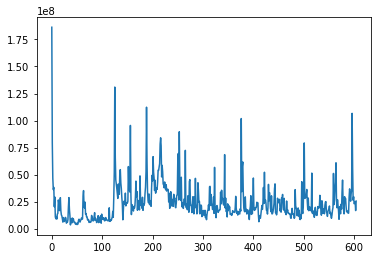

In [6]:
plt.plot(data['Volume'])

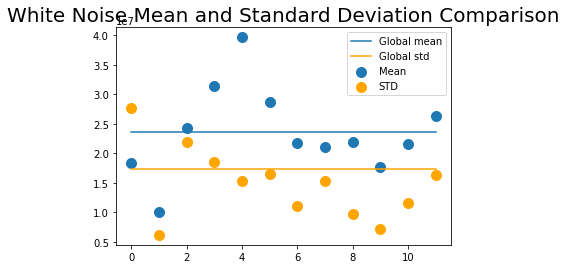

In [27]:
import numpy as np
x = 0
mean = []
std = []
for i in range(12):
    mean.append(data['Volume'].iloc[x:x+50].mean())
    std.append(data['Volume'].iloc[x:x+50].std())
    x+=50

plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(mean)), [data['Volume'].mean()] * len(mean), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(mean)), y=mean, label='Mean', s=100)
plt.plot(np.arange(len(std)), [data['Volume'].std()] * len(std), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(std)), y=std, label='STD', color='orange', s=100)
plt.legend();

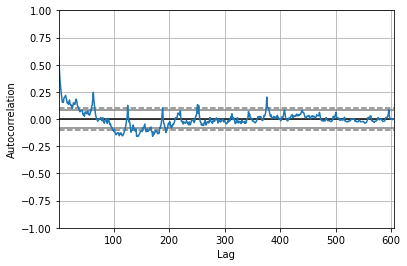

In [9]:
autocorrelation_plot(data['Volume'])

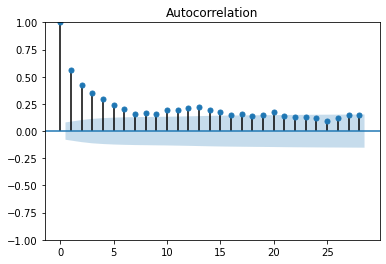

In [16]:
plot_acf(data['Volume']);

In [19]:
# check if the data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Volume'], autolag='AIC')
print("p-value",result[1])

p-value 9.539891701553384e-05


In [ ]:
# p-value is <0.05 hence data is stationary.
# also the autocorrelation plot is significant for values<20
# so data volume is not white noise